# Laptop_Price_Predicion

Key responsibilities:
datasets cleaning and organizing production of large datasets for pattern and trend recognition
Attended variou conferences and seminars to enhance knowledge of data science and machine learning trends
data visualizations and Exploratorty data analysis for  meaningful data insights
Developed multiple machine learning regression algorithm using python(Linear Regression,decision tree regresar ,Random forest regresar,SVM,)

Import The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data gathiring
data gathiring in kaggle 

In [2]:
df=pd.read_csv('laptop_price.csv',encoding="latin-1")

Read the top 5 records

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [5]:
df.shape

(1303, 13)

In [6]:
df.select_dtypes('number')

,laptop_ID,Inches,Price_euros
0,1,13.3,1339.69
1,2,13.3,898.94
2,3,15.6,575.00
3,4,15.4,2537.45
4,5,13.3,1803.60
...,...,...,...
1298,1316,14.0,638.00
1299,1317,13.3,1499.00
1300,1318,14.0,229.00
1301,1319,15.6,764.00


In [7]:
df.select_dtypes('object')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


In [8]:
# Checking the data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
# Check the descriptive statistics of numeric variables
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [10]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [11]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [12]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [13]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

# Data preproresing

copy the base data for manupulation & processing

In [14]:
data=df.copy()

In [15]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


To find the percentage of missing data in the dataframe for each column

In [16]:
df.isnull().sum()*100/len(data)

laptop_ID           0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

checking duplicates columns and rows

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

remove gb and kg from Ram and weight ,and convert the cols to numeric

In [18]:
#remove gb and kg from Ram and weight
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

# Ram and weight is convert to numeric
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [19]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


rename the price_euros into price

In [20]:
df= df.rename(columns={"Price_euros": "Price"})
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [21]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [22]:
def findXresolution(s):
    return s.split()[-1].split('x')[0]
def findYresolution(s):
    return s.split()[-1].split('x')[1]

finding the x_res and y_res from screen resolution 
ScreenResolution split

In [23]:
#finding the x_res and y_res from screen resolution 
df['x_res']=df['ScreenResolution'].apply(lambda x:findXresolution(x))
df['y_res']=df['ScreenResolution'].apply(lambda y:findYresolution(y))

#convert to numeric
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [24]:
df['PPI'] = (((df['x_res']**2) + (df['y_res']**2))**0.5 / df['Inches']).astype('float')


In [25]:
df.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
x_res          0.556529
y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price, dtype: float64

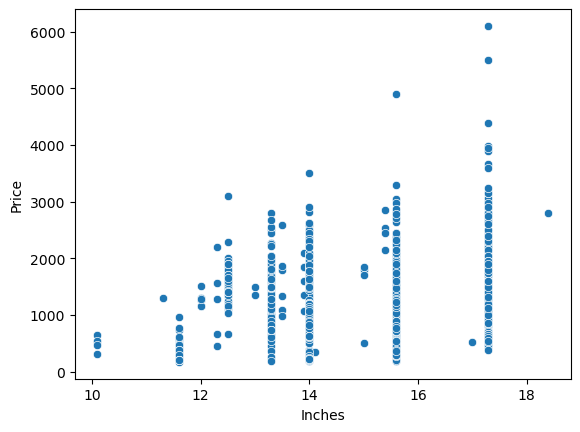

In [26]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.show()


drop not used columns 

In [27]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [28]:
df.drop('laptop_ID',axis=1,inplace=True)

first we will extract name of cpu ehich is first 3 words from cpu column and then we will check which processor it is

In [29]:
def fetch_processor(x):
    cpu_name=" ".join(x.split()[0:3])
    if cpu_name=='Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
df['Cpu_brand']=df['Cpu'].apply(lambda x:fetch_processor(x))    

In [30]:
df['Memory'] = df['Memory'].astype(str).replace('.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split('+', n=1, expand=True)
df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second'] = new[1]
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df["Layer1Hybrid"] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df['first'] = df['first'].str.replace(r'D', '')
df['second'].fillna('0', inplace=True)
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df["Layer2Hybrid"] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df['second'] = df['second'].str.replace(r'D', '')

#binary encoding

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

#only keep integert(digits)
df['second'] = df['second'].str.replace(r'D', '')


# Extract numeric values from 'first' and 'second' columns
df['first'] = df['first'].str.extract('(\d+)', expand=False)
df['second'] = df['second'].str.extract('(\d+)', expand=False)

# Convert to numeric
df['first'] = pd.to_numeric(df['first'], errors='coerce')
df['second'] = pd.to_numeric(df['second'], errors='coerce')

In [31]:
#finalize the columns by keeping value

df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SDD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

#drop the unrequired column
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD','Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)
df.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [32]:
#which brand Gpu is in Laptop
data['brand_Gpu']=data['Gpu'].apply(lambda x:x.split()[0])
data['brand_Gpu'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [33]:
df['brand_Gpu']=df['Gpu'].apply(lambda x:x.split()[0])
df['brand_Gpu'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [34]:
len(df[df['brand_Gpu']=='ARM'])

1

In [35]:
df[df['brand_Gpu']=='ARM'].count()

Company        1
Product        1
TypeName       1
Ram            1
Gpu            1
OpSys          1
Weight         1
Price          1
Touchscreen    1
IPS            1
PPI            1
Cpu_brand      1
HDD            1
SDD            1
brand_Gpu      1
dtype: int64

In [36]:
#there is only 1 row of ARM GPU so remove it
df=df[df['brand_Gpu']!='ARM']
df.drop(columns=['Gpu'],inplace=True)

In [37]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [38]:
#get which os system

def get_os(a):
    if a=='Windows 10'or a=='Windows 10 S'or a=='Windows 7':
        return 'Windows'
    elif a=='macOS'or a=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['os']=df['OpSys'].apply(get_os) 

In [39]:
df.drop(columns=['OpSys'],inplace=True)

# EDA

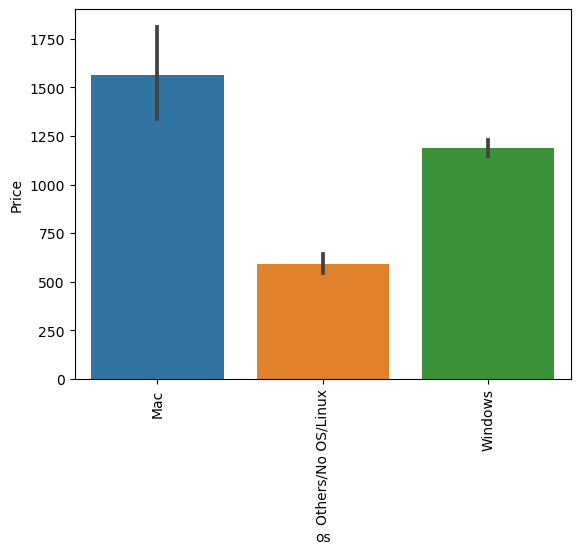

In [40]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

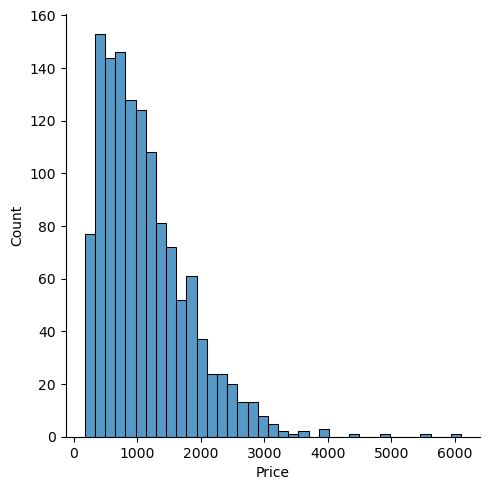

In [41]:
sns.displot(df['Price'])
plt.show()

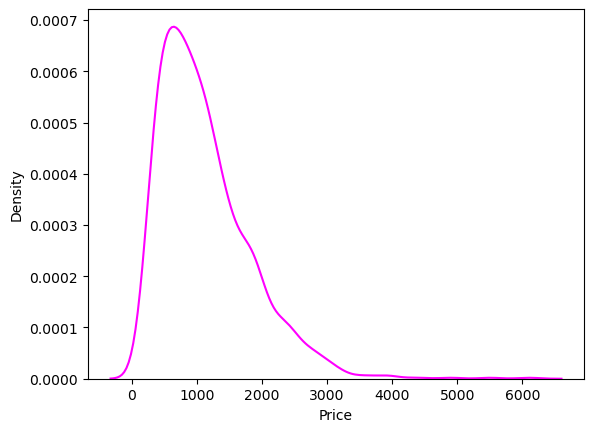

In [42]:
sns.kdeplot(df['Price'], color = 'Magenta')
plt.show()

<Axes: xlabel='Price'>

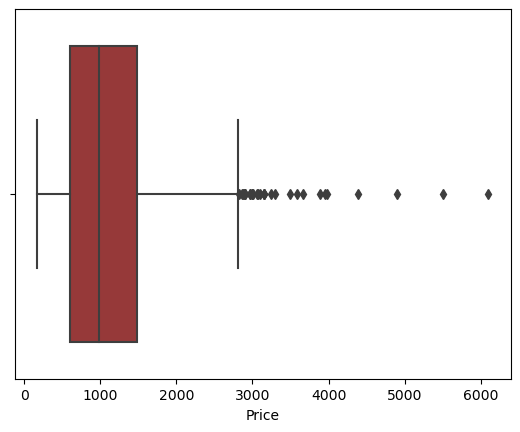

In [43]:
sns.boxplot(x = df['Price'], color = 'brown')

The price data is right skewed with outliers higher than 3000 euros

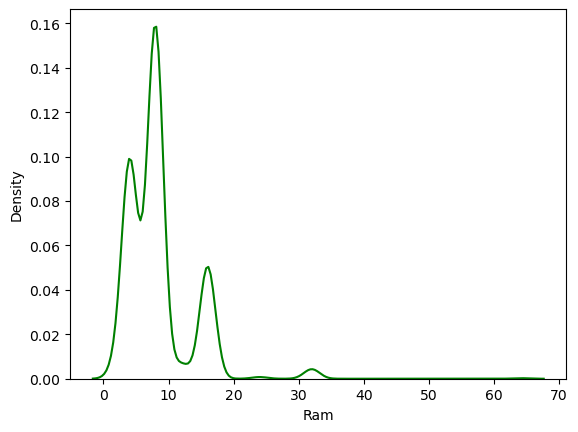

In [44]:
sns.kdeplot(df['Ram'], color = 'Green')
plt.show()

<Axes: xlabel='Ram'>

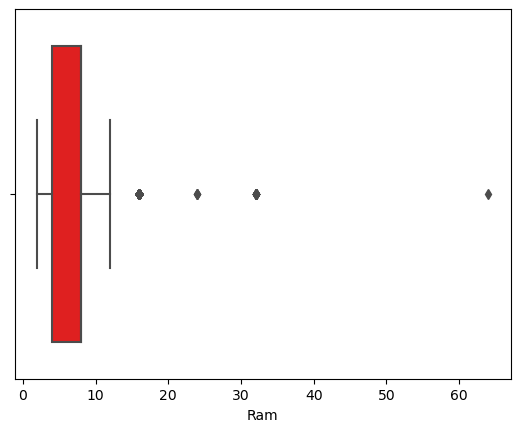

In [45]:
sns.boxplot(x = df['Ram'], color = 'red')

The price data is right skewed with outliers higher than 12 GB

<Axes: xlabel='Weight'>

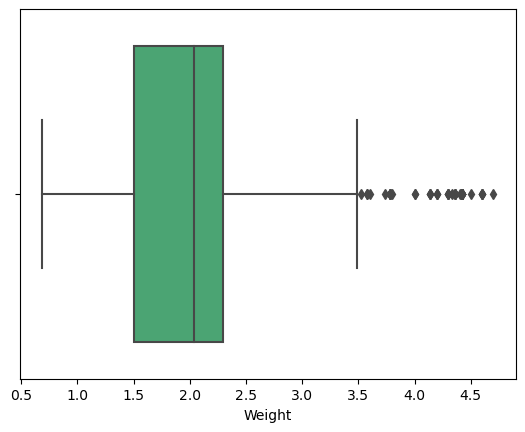

In [46]:
sns.boxplot(x = df['Weight'], color = 'mediumseagreen')

The weight data is near to normal distribution with outliers larger than 3.5 KG

Biggest company in the market

In [47]:
round(df.groupby(['Company']).count().sort_values('Price',ascending = False)[['Product']]/df.shape[0]*100,2)

,Product
Company,
Dell,22.81
Lenovo,22.81
HP,21.04
Asus,12.14
Acer,7.91
MSI,4.15
Toshiba,3.69
Apple,1.61
Samsung,0.61


<Axes: xlabel='Company', ylabel='count'>

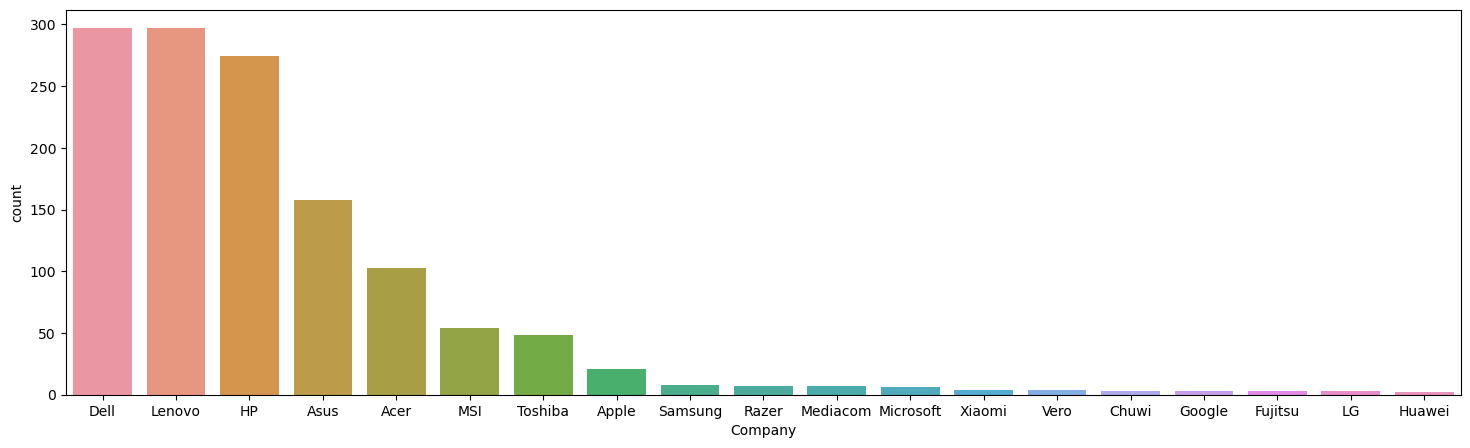

In [48]:
# Ordering the companies
category_counts = df['Company']
category_order = category_counts.value_counts().index
# Visualization
plt.figure(figsize=(18, 5))
sns.countplot(data = df, x = 'Company', order = category_order)

Biggest company in sales

In [49]:
dfs = df.groupby(['Company'])[['Price', 'Company']].sum().sort_values("Price", ascending = False)
dfs

,Price
Company,
Dell,352262.49
Lenovo,322656.18
HP,292570.31
Asus,174458.76
MSI,93361.04
Acer,64557.91
Toshiba,60855.00
Apple,32848.17
Razer,23423.00


Which company has the most expensive laptop?

In [50]:
dfm = df.groupby(['Company'])[['Price', 'Company']].mean().sort_values("Price", ascending = False)
dfm

,Price
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Samsung,1507.750000
Huawei,1424.000000
Toshiba,1267.812500


Although Dell has the biggest sales, Razar has the most expensive laptops.
We can say that dell depends on the volume of sales.


The most ordered laptop type

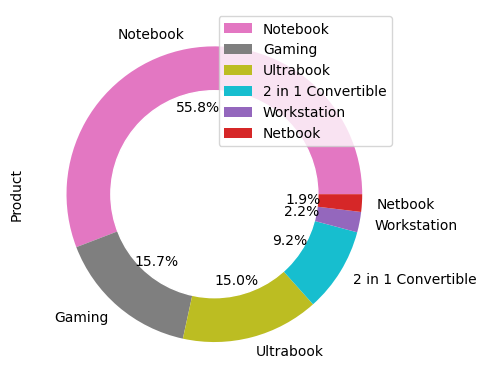

In [51]:
round(df.groupby(['TypeName']).count().sort_values('Price',ascending = False)[['Product']]/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", subplots = True, colors = ["#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#9467bd", "#d62728"]

)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

the relation of price with Ram and size

In [52]:
df.corr()

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SDD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,-0.143865,0.604300
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.176670,-0.059328
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.299564,0.671940
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.084878,0.255358
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.131479,0.227992
PPI,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.259654,0.508786
HDD,-0.143865,0.176670,-0.299564,-0.084878,-0.131479,-0.259654,1.000000,-0.453930
SDD,0.604300,-0.059328,0.671940,0.255358,0.227992,0.508786,-0.453930,1.000000


<Axes: >

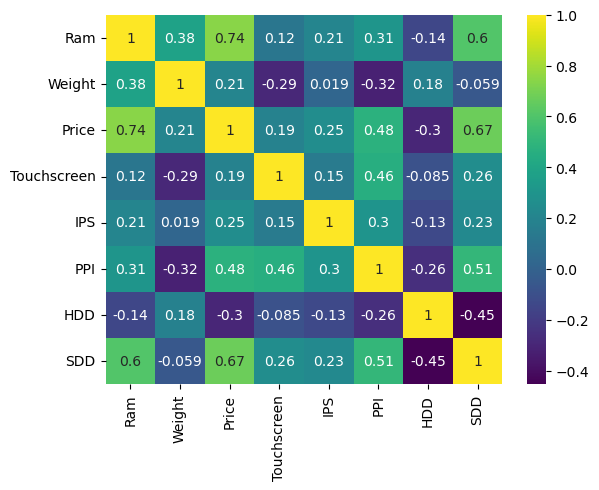

In [53]:
sns.heatmap(df.corr(), cmap = 'viridis', annot= True)

As expected The price is correlated to the Ram but it is not the only factor of price

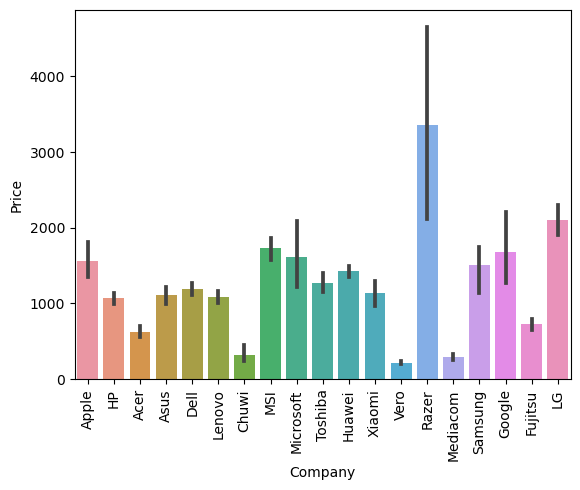

In [54]:
#what is avg price of each brand?
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


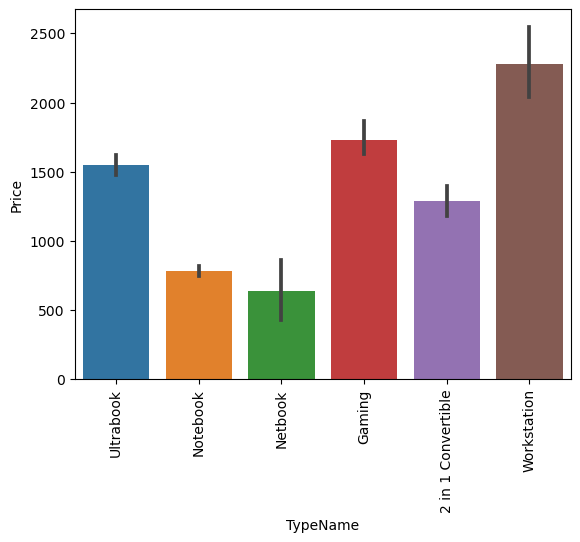

In [55]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

workstation typename is high price

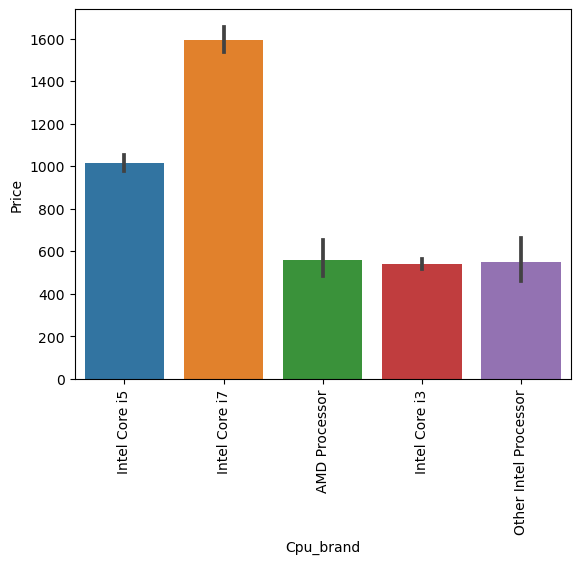

In [56]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

intel core 17 cpu_brand is high dimanded and high prices

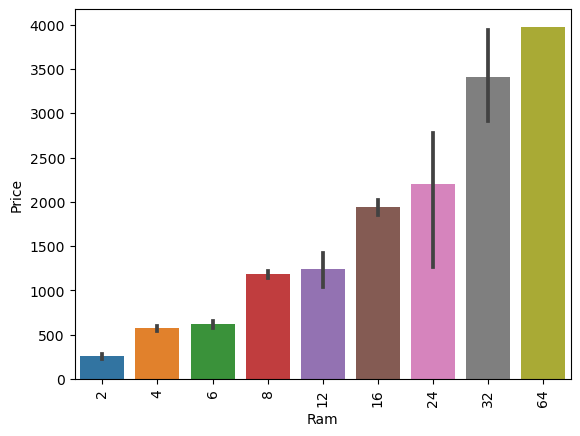

In [57]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# CONCLUSION

These are some of the quick insights from this exercise:

1.Although Dell has the biggest sales, Razar has the most expensive laptops. We can say that dell depends on the volume of sales.
2.As expected The price is correlated to the Ram but it is not the only factor of price
3.intel core 17 cpu_brand is high dimanded and high prices
4.notbook is  most ordered laptop type
5.As expected The price is correlated to the Ram but it is not the only factor of price
6.Dell is the biggest company in sales and Biggest company in the market

# Lable Encoding

In [58]:
df.dtypes

Company         object
Product         object
TypeName        object
Ram              int32
Weight         float32
Price          float64
Touchscreen      int64
IPS              int64
PPI            float64
Cpu_brand       object
HDD              int64
SDD              int64
brand_Gpu       object
os              object
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder

columns = ['Company', 'Product', 'TypeName', 'Cpu_brand', 'brand_Gpu', 'os']
for col in columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [60]:
df.head()

,Company,Product,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SDD,brand_Gpu,os
0,1,299,4,8,1.37,1339.69,0,1,226.983005,2,0,128,1,0
1,1,300,4,8,1.34,898.94,0,0,127.677940,2,0,0,1,0
2,7,50,3,8,1.86,575.00,0,0,141.211998,2,0,256,1,1
3,1,299,4,16,1.83,2537.45,0,1,220.534624,3,0,512,0,0
4,1,299,4,8,1.37,1803.60,0,1,226.983005,2,0,256,1,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int32  
 1   Product      1302 non-null   int32  
 2   TypeName     1302 non-null   int32  
 3   Ram          1302 non-null   int32  
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   PPI          1302 non-null   float64
 9   Cpu_brand    1302 non-null   int32  
 10  HDD          1302 non-null   int64  
 11  SDD          1302 non-null   int64  
 12  brand_Gpu    1302 non-null   int32  
 13  os           1302 non-null   int32  
dtypes: float32(1), float64(2), int32(7), int64(4)
memory usage: 111.9 KB


In [62]:
df.isna().sum()

Company        0
Product        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
IPS            0
PPI            0
Cpu_brand      0
HDD            0
SDD            0
brand_Gpu      0
os             0
dtype: int64

# Model train_test_split

In [63]:
x=df.drop('Price',axis=1)

In [64]:
y=df['Price']

In [65]:
x.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SDD,brand_Gpu,os
0,1,299,4,8,1.37,0,1,226.983005,2,0,128,1,0
1,1,300,4,8,1.34,0,0,127.677940,2,0,0,1,0
2,7,50,3,8,1.86,0,0,141.211998,2,0,256,1,1
3,1,299,4,16,1.83,0,1,220.534624,3,0,512,0,0
4,1,299,4,8,1.37,0,1,226.983005,2,0,256,1,0


y.head()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [68]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1041, 13)
(261, 13)
(1041,)
(261,)


# Model building:

# LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model= LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [71]:
#predict test data 
pred=model.predict(xtest)

print(mean_absolute_error(ytest,pred))
print(mean_squared_error(ytest,pred))
print(r2_score(ytest,pred))

282.36566886723307
159554.76718376976
0.7022143516899053


In [72]:
#predict train data
pred2=model.predict(xtrain)

print(mean_absolute_error(ytrain,pred2))
print(mean_squared_error(ytrain,pred2))
print(r2_score(ytrain,pred2))

282.73475713824826
145763.69661626464
0.694078166111791


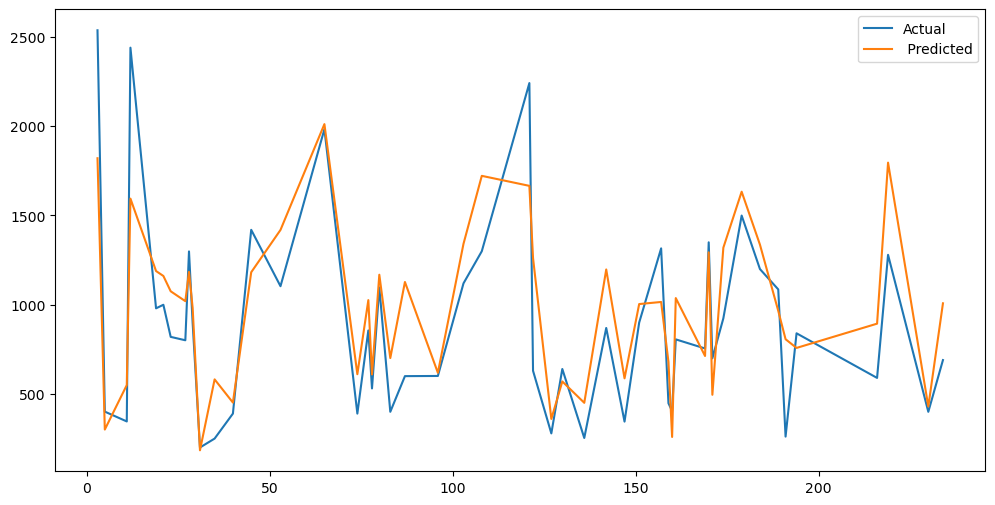

In [73]:
df2 = pd.DataFrame({"Y_test" : ytest , "Y_predict": pred})
df2 = df2.sort_index()
plt.figure(figsize= (12,6))
plt.plot(df2[:50])
plt.legend(["Actual" , " Predicted"])
plt.show()

Linear regressin Now we can see quite better results, i.e.test data  Accuracy: 71 %, and train data  Accuracy: 69 % a very good recall, precision & f1 score for minority class.

# RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
mode= RandomForestRegressor()
mode.fit(xtrain,ytrain)

RandomForestRegressor()

In [76]:
#predict test data

p=mode.predict(xtest)

print(mean_absolute_error(ytest,p))
print(mean_squared_error(ytest,p))
print(r2_score(ytest,p))

184.47515635467974
89202.70236720804
0.8335161961984077


In [77]:
#predict train data 
pr=mode.predict(xtrain)
print(mean_absolute_error(ytrain,pr))
print(mean_squared_error(ytrain,pr))
print(r2_score(ytrain,pr))

68.86969814955857
12333.843711671529
0.9741143221888894


# Model Evaluation After Hyperparameter Tuning

In [78]:
model1= RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
model1.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [79]:
#predict test data
y_pred=model1.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print(f'MAE :{mean_absolute_error(ytest,y_pred)}')  
print(f'MSE :{mean_squared_error(ytest,y_pred)}')  

R2 score 0.8317811681028026
MAE :190.1050700499246
MSE :90132.3375105488


In [80]:
#predict train data 
x_pred=model1.predict(xtrain)
print(mean_absolute_error(ytrain,x_pred))
print(mean_squared_error(ytrain,x_pred))
print(r2_score(ytrain,x_pred))

113.26343961601775
31768.33438358976
0.9333261481438225


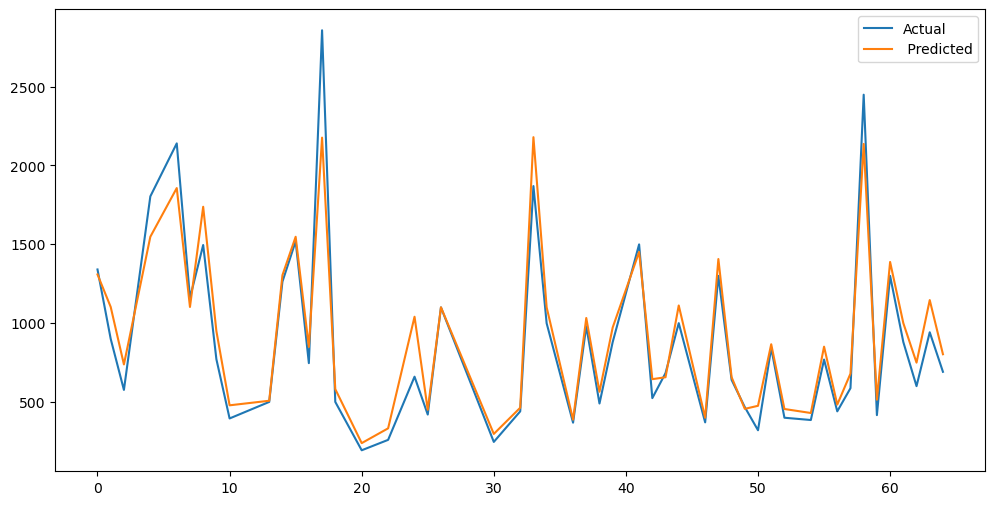

In [81]:
df4 = pd.DataFrame({"Y_test" : ytrain , "Y_predict": x_pred})
df4 = df4.sort_index()
plt.figure(figsize= (12,6))
plt.plot(df4[:50])
plt.legend(["Actual" , " Predicted"])
plt.show()

Random forest Now we can see quite better results, i.e. test data Accuracy: 84 %, and train data accuracy :93%  a very good recall, precision & f1 score for minority class.

# DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor


In [83]:
model=DecisionTreeRegressor(max_depth=5,min_samples_split=8,min_samples_leaf=8)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8)

In [84]:
#predict test data
pred=model.predict(xtest)

print(mean_absolute_error(ytest,pred))
print(mean_squared_error(ytest,pred))
print(r2_score(ytest,pred))

262.00996894628264
146249.51193002716
0.7270466655818719


In [85]:
#predict train data
pred2=model.predict(xtrain)
print(mean_absolute_error(ytrain,pred2))
print(mean_squared_error(ytrain,pred2))
print(r2_score(ytrain,pred2))

234.14549364989696
117188.47877682486
0.7540504585832832


In [86]:
df3=pd.DataFrame({'predict':ytrain,'actual':pred2})


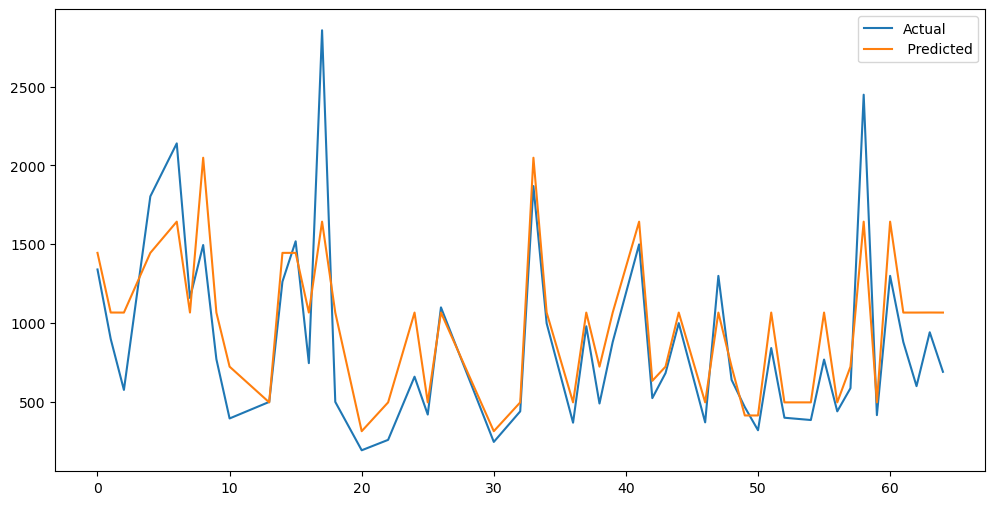

In [87]:
df3 = df3.sort_index()
plt.figure(figsize= (12,6))
plt.plot(df3[:50])
plt.legend(["Actual" , " Predicted"])
plt.show()

Decision TreeRegressor Now we can see quite better results, i.e. test data Accuracy: 75 %, and train data accuracy :75% a very good recall, precision & f1 score for minority class.


In [89]:
from sklearn.svm import SVR

In [90]:
svr=SVR()
svr.fit(xtrain,ytrain)

SVR()

In [91]:
pr=svr.predict(xtest)

mean_absolute_error(pr,ytest)

508.0453133189906